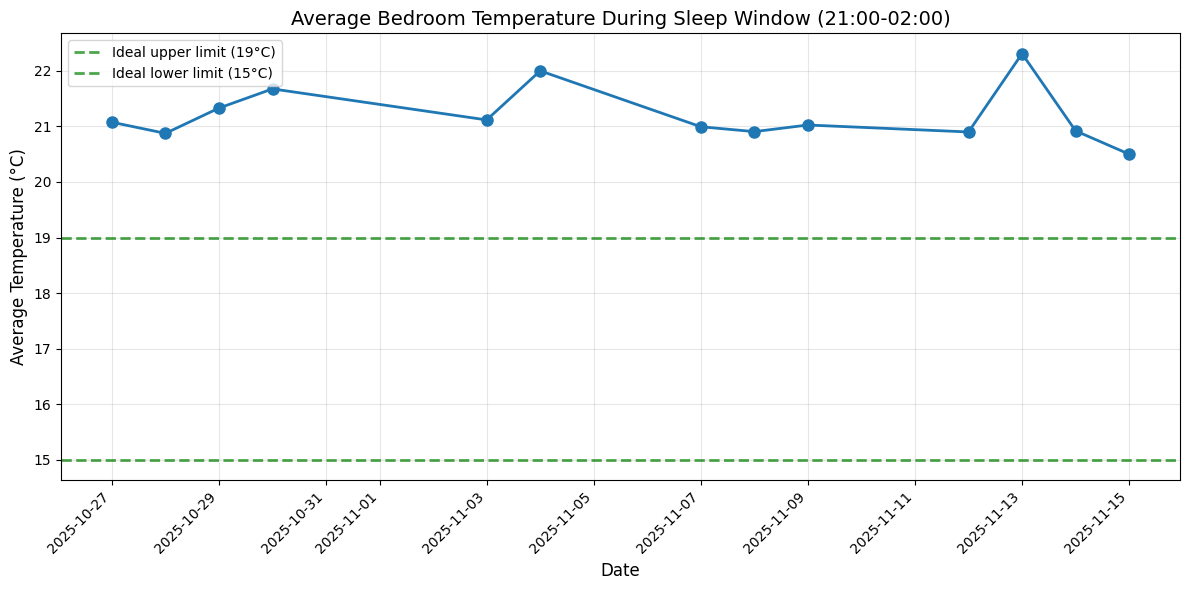

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time, timedelta

# Load the devices data (Arduino sensor)
devices_df = pd.read_csv('devices-data.csv')

# Convert created_at to datetime
devices_df['created_at'] = pd.to_datetime(devices_df['created_at'])

# Adjust for 1 hour timezone difference
devices_df['created_at'] = devices_df['created_at'] + timedelta(hours=1)

# Extract date and time
devices_df['date'] = devices_df['created_at'].dt.date
devices_df['time'] = devices_df['created_at'].dt.time

# Filter data between 21:00 and 02:00
# Note: 02:00 is next day, so we need to handle this carefully
def is_in_sleep_window(time_obj):
    """Check if time is between 21:00 and 02:00"""
    if time_obj >= time(21, 0) or time_obj <= time(2, 0):
        return True
    return False

devices_df['in_sleep_window'] = devices_df['time'].apply(is_in_sleep_window)

# Filter data within sleep window
sleep_window_data = devices_df[devices_df['in_sleep_window']].copy()

# Group by date and calculate average temperature
daily_avg_temp = sleep_window_data.groupby('date')['temperature'].mean().reset_index()
daily_avg_temp.columns = ['date', 'avg_temperature']

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp['date'], daily_avg_temp['avg_temperature'],
         marker='o', linestyle='-', linewidth=2, markersize=8)

# Add reference lines for ideal sleep temperature (15-19°C)
plt.axhline(y=19, color='green', linestyle='--', linewidth=2,
            label='Ideal upper limit (19°C)', alpha=0.7)
plt.axhline(y=15, color='green', linestyle='--', linewidth=2,
            label='Ideal lower limit (15°C)', alpha=0.7)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Average Bedroom Temperature During Sleep Window (21:00-02:00)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig('bedroom_temperature_sleep_window.png', dpi=300, bbox_inches='tight')
plt.show()